In [1]:
# !pip install -r ../requirements.txt --upgrade -q

# Previsão de Reclamações de Consumidores

O aumento no número de queixas registradas por consumidores é um sinal de alerta para qualquer empresa. Cada reclamação representa uma falha na entrega de valor ao cliente, podendo levar à insatisfação, perda de confiança e, consequentemente, cancelamento de serviços/abandono da marca. No contexto de uma grande empresa, um volume elevado de queixas pode ter um impacto significativo na receita, na reputação e no crescimento a longo prazo. Ao invés de lidar com as queixas de forma reativa, a empresa pode, através da análise de dados, antecipar e prevenir a insatisfação dos clientes.

O objetivo deste trabalho é avaliar o perfil de clientes de um mercado e identificar os principais fatores que podem levar clientes a efetuarem reclamações. Para isso será utilizado o conjunto de dados disponível em https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis. O conjunto de dados oferece uma visão ampla dos consumidores, incluindo:

*   **Dados demográficos:** Idade, renda, educação e composição familiar. Esses dados permitem segmentar os clientes e identificar se certos grupos demográficos são mais propensos a reclamar do que outros.
*   **Padrões de consumo:** Informações sobre os hábitos de compra dos consumidores, como valor gasto, frequência de compras e canais utilizados. Esses dados podem revelar se certos produtos, serviços ou canais de compra estão gerando mais reclamações.

A análise desse conjunto de dados é importante por diversos motivos:

1.  **Identificação das causas raiz das reclamações:** Ao invés de tratar os sintomas (as reclamações em si), a empresa pode usar a análise de dados para entender os fatores subjacentes que levam à insatisfação. Por exemplo, será que clientes de uma determinada faixa etária que compram online estão mais insatisfeitos? Existe uma correlação entre renda e o número de reclamações?
2.  **Tomada de decisão baseada em dados:** A análise permite que a empresa tome decisões estratégicas baseadas em fatos concretos, e não em suposições. Isso torna as ações de melhoria mais eficazes e direcionadas.
3.  **Melhoria da experiência do cliente:** Ao entender o que gera insatisfação, a empresa pode implementar mudanças que melhorem a experiência do cliente de forma proativa, reduzindo a probabilidade de futuras reclamações.
4.  **Redução de custos:** Resolver problemas antes que eles se transformem em reclamações é mais barato do que lidar com as consequências da insatisfação do cliente, como perda de clientes, custos de atendimento ao cliente e danos à reputação.
5.  **Aumento da retenção de clientes:** Um cliente satisfeito é mais propenso a permanecer fiel à marca. Ao reduzir o número de reclamações e melhorar a experiência do cliente, a empresa pode aumentar a retenção e o valor do ciclo de vida do cliente (customer lifetime value).
6.  **Vantagem competitiva:** Empresas que utilizam dados para entender e atender melhor seus clientes ganham uma vantagem competitiva significativa no mercado.

**Contribuição para o entendimento do comportamento dos consumidores:**

Esta análise contribui para um entendimento mais profundo do comportamento dos consumidores ao:

*   **Revelar padrões e tendências:** Identificar quais fatores estão fortemente correlacionados com a probabilidade de um cliente registrar uma reclamação.
*   **Permitir a segmentação de clientes:** Agrupar os clientes com base em características e comportamentos semelhantes, permitindo um atendimento mais personalizado e eficaz.
*   **Prever o comportamento futuro:** Construir um modelo preditivo que possa identificar clientes com alto risco de insatisfação, permitindo que a empresa intervenha proativamente.

Em resumo, a análise do conjunto de dados não é apenas uma tarefa técnica, mas sim uma **iniciativa estratégica** que pode ajudar a empresa a melhorar a satisfação do cliente, reduzir custos, aumentar a retenção e fortalecer sua posição no mercado. Ao transformar dados em insights acionáveis, a empresa pode construir relacionamentos mais fortes e duradouros com seus clientes.



## Campos do Conjunto de Dados

**Cliente**

*   **ID:** Identificador único do cliente.
*   **Year_Birth:** Ano de nascimento do cliente.
*   **Education:** Nível de escolaridade do cliente.
*   **Marital_Status:** Estado civil do cliente.
*   **Income:** Renda familiar anual do cliente.
*   **Kidhome:** Número de crianças no domicílio do cliente.
*   **Teenhome:** Número de adolescentes no domicílio do cliente.
*   **Dt_Customer:** Data de cadastro do cliente na empresa.
*   **Recency:** Número de dias desde a última compra do cliente.
*   **Complain:** 1 se o cliente fez uma reclamação nos últimos 2 anos, 0 caso contrário.

**Produto**

*   **MntWines:** Valor gasto em vinhos nos últimos 2 anos.
*   **MntFruits:** Valor gasto em frutas nos últimos 2 anos.
*   **MntMeatProducts:** Valor gasto em carnes nos últimos 2 anos.
*   **MntFishProducts:** Valor gasto em peixes nos últimos 2 anos.
*   **MntSweetProducts:** Valor gasto em doces nos últimos 2 anos.
*   **MntGoldProds:** Valor gasto em ouro nos últimos 2 anos.

**Local / Canal de Compra**

*   **NumWebPurchases:** Número de compras feitas através do site da empresa.
*   **NumCatalogPurchases:** Número de compras feitas usando um catálogo.
*   **NumStorePurchases:** Número de compras feitas diretamente nas lojas.
*   **NumWebVisitsMonth:** Número de visitas ao site da empresa no último mês.

**Promoção**

*   **NumDealsPurchases:** Número de compras feitas com desconto.
*   **AcceptedCmp1:** 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário.
*   **AcceptedCmp2:** 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário.
*   **AcceptedCmp3:** 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário.
*   **AcceptedCmp4:** 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário.
*   **AcceptedCmp5:** 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário.
*   **Response:** 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário.

## Imports e carga do Dataset

In [2]:
import os
import random
import sys
import warnings

from datetime import date
from pathlib import Path

warnings.filterwarnings('ignore')
PROJECT_PATH = os.path.abspath('..')
sys.path.append(PROJECT_PATH)



import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import shap
import tqdm
import xgboost


from IPython.display import display, Markdown
from imblearn.over_sampling import (
    BorderlineSMOTE,
    SMOTE,
)
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    MinMaxScaler,
    RobustScaler,
    StandardScaler,
)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier


# Variáveis globais
SEED = 42
dataset_path = Path(PROJECT_PATH) / 'data' / 'marketing_campaign.csv'

# sementes
random.seed(SEED)
np.random.seed(SEED)

# configurações
pd.options.display.max_columns = 500
default_figsize = (16, 5)
default_figsize_small = (16, 2.5)
shap.initjs()

# funcoes
def conf_interval(mean, std, n, alpha=0.95):
    h = std * t.ppf((1 + alpha) / 2, n - 1)
    return mean - h, mean + h

In [3]:
df = pd.read_csv(dataset_path, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Análise Exploratória

### Informações gerais

In [4]:
md = f'''\
__Quantidade de Variáveis__: {df.shape[1]} \\
__Quantidade de Observações__: {df.shape[0]}

__RowNumber__: Um número sequencial atribuído a cada linha. \\
__CustomerId__: Um identificador único para cada cliente. 

A coluna ID não é relevante para a análise, portanto, será removida.
'''

display(Markdown(md))

df.drop(columns=['ID'], inplace=True, errors='ignore')

__Quantidade de Variáveis__: 29 \
__Quantidade de Observações__: 2240

__RowNumber__: Um número sequencial atribuído a cada linha. \
__CustomerId__: Um identificador único para cada cliente. 

A coluna ID não é relevante para a análise, portanto, será removida.


### Valores Nulos


In [5]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

A única coluna que apresenta valores nulos é Income. Este problema será avaliado na análise exploratória dessa variável.

### Complain

Variável Alvo. Indica se o cliente realizou reclamações nos últimos 2 anos. (1 para sim, 0 para não).

In [6]:
df['Complain'].value_counts(normalize=False)

Complain
0    2219
1      21
Name: count, dtype: int64

O dataset possui um desbalanceamento muito acentuado para a variável alvo.

### Year_Birth

Ano de nascimento do cliente.

In [7]:
df['Age'] = date.today().year - df['Year_Birth']
df['Age'].describe()

count    2240.000000
mean       56.194196
std        11.984069
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64

In [8]:
df_vc = df['Age'].value_counts()
df_vc.head()

Age
49    89
54    87
50    83
53    79
47    77
Name: count, dtype: int64

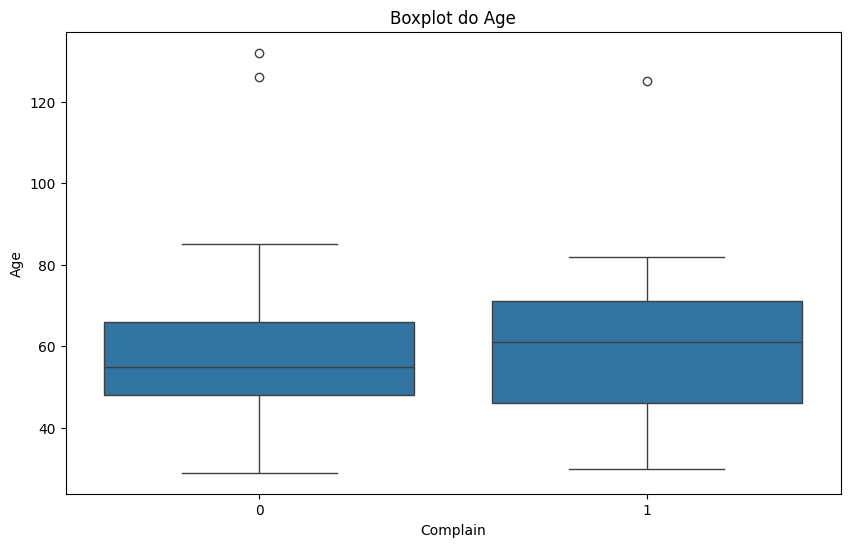

In [9]:
# Year_Birth x Complain

plt.figure(figsize=(10,6))
sns.boxplot(y='Age', x='Complain', data=df)
plt.title('Boxplot do Age')
plt.show()

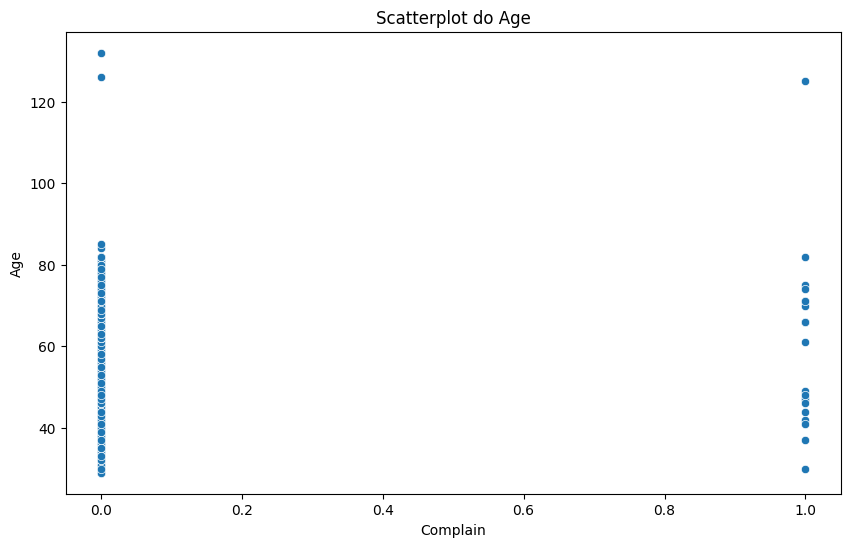

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='Age', x='Complain', data=df)
plt.title('Scatterplot do Age')
plt.show()

In [11]:
df.drop(columns=['Year_Birth'], inplace=True, errors='ignore')

### Education

Nível de escolaridade do cliente. Variável categórica que pode ter os valores, do menos instruído para o mais instruído:

* **Basic (Ensino Fundamental/Básico)**: Representa o nível mais baixo de educação formal, geralmente correspondendo aos primeiros anos de escolaridade obrigatória.
* **2nd Cycle (Ensino Médio/Secundário)**: Representa a conclusão da educação secundária, que normalmente segue a educação básica.
* **Graduation (Graduação/Ensino Superior - Bacharelado/Licenciatura)**: Representa a conclusão do primeiro ciclo do ensino superior, conferindo um diploma de bacharel ou licenciado.
* **Master (Mestrado)**: É um grau acadêmico de pós-graduação, indicando um nível de especialização em uma determinada área após a conclusão da graduação.
* **PhD (Doutorado/Doutoramento)**: É o grau acadêmico mais elevado, representando o auge da formação acadêmica e a capacidade de realizar pesquisas originais e independentes.

In [12]:
df['Education'].describe()

count           2240
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object

In [13]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [14]:
df[['Education','Complain']].groupby(['Education','Complain']).size().reset_index(name='Total')

,Education,Complain,Total
0,2n Cycle,0,199
1,2n Cycle,1,4
2,Basic,0,54
3,Graduation,0,1113
4,Graduation,1,14
5,Master,0,368
6,Master,1,2
7,PhD,0,485
8,PhD,1,1


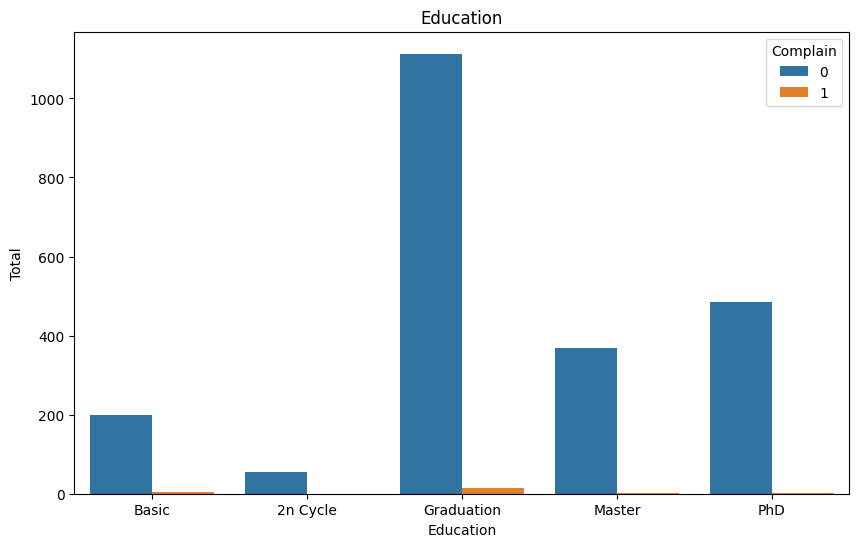

In [15]:
plt.figure(figsize=(10,6))
df_vc = df[['Education','Complain']].groupby(['Education','Complain']).size().reset_index(name='Total')
sns.barplot(x='Education', y='Total', hue='Complain', data=df_vc, orient='v')
plt.title('Education')
plt.xticks(ticks=[0,1,2,3,4], labels=['Basic','2n Cycle','Graduation','Master','PhD'])
plt.show()

### Marital_Status

Estado civil do cliente.

*   **Married (Casado):** Representa indivíduos que estão em um casamento legalmente reconhecido. É uma situação formalizada de união entre duas pessoas, com implicações legais, sociais e, muitas vezes, religiosas.
*   **Together (Juntos):** Esta categoria é mais ampla e sugere um relacionamento sério e comprometido, onde duas pessoas estão em uma parceria, mas sem necessariamente estarem casadas. Pode incluir casais que moram juntos (união estável), noivos, ou aqueles que simplesmente se consideram em um relacionamento estável e de longo prazo. A principal diferença para "Casado" é a ausência do vínculo legal.
*   **Single (Solteiro):** Refere-se a indivíduos que não estão em um relacionamento sério ou comprometido no momento. Eles não são casados, não estão "juntos" no sentido descrito acima, e podem ou não estar ativamente buscando um parceiro. Este estado é frequentemente associado à independência e liberdade pessoal.
*   **Divorced (Divorciado):** Descreve pessoas que foram legalmente casadas, mas cujo casamento foi dissolvido por meio de um processo legal de divórcio. Isso indica o término formal de um casamento anterior.
*   **Widow (Viúvo/Viúva):** Esta categoria se refere a indivíduos cujo cônjuge faleceu.

*   **Alone (Sozinho):** Este termo é um pouco mais subjetivo e pode se sobrepor a outras categorias como "Solteiro" ou "Divorciado". x

*   **Absurd (Absurdo):** Esta é uma categoria não convencional em termos de estado civil. Pode indicar uma resposta sarcástica, uma recusa em se enquadrar nas categorias tradicionais ou simplesmente uma situação de relacionamento que é difícil de definir ou categorizar.

*   **YOLO (You Only Live Once - Você Só Vive Uma Vez):**  Mais do que um estado civil, YOLO é uma filosofia de vida. No contexto de relacionamentos, pode indicar uma atitude despreocupada em relação a compromissos sérios, uma preferência por experiências casuais ou uma abordagem não convencional aos relacionamentos. Também é possível que seja usado de forma humorística.

Existem algumas categorias incomuns que talvez possam ser agrupadas em outras caso seja interessante ou hajam poucos dados.

In [16]:
df['Marital_Status'].describe()

count        2240
unique          8
top       Married
freq          864
Name: Marital_Status, dtype: object

In [17]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [18]:
df[['Marital_Status','Complain']].groupby(['Marital_Status','Complain']).size().reset_index(name='Total')

,Marital_Status,Complain,Total
0,Absurd,0,2
1,Alone,0,3
2,Divorced,0,230
3,Divorced,1,2
4,Married,0,856
5,Married,1,8
6,Single,0,474
7,Single,1,6
8,Together,0,575
9,Together,1,5


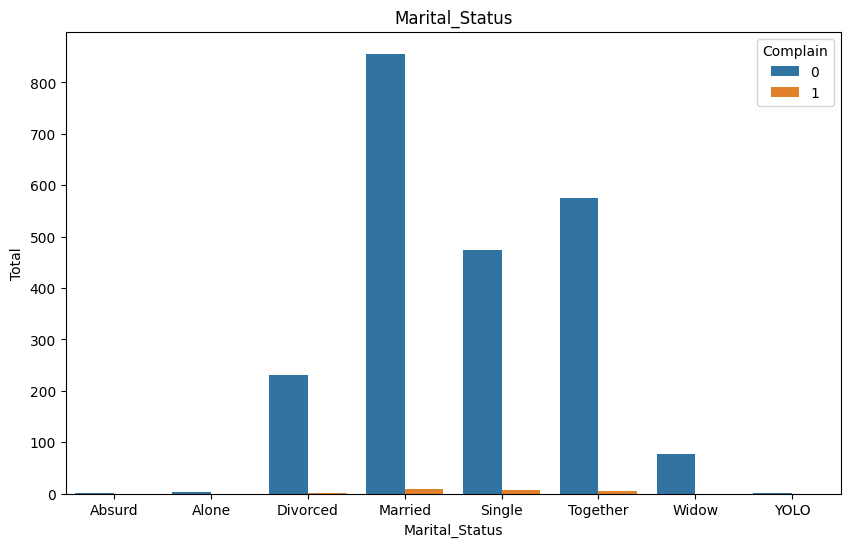

In [19]:
plt.figure(figsize=(10,6))
df_vc = df[['Marital_Status','Complain']].groupby(['Marital_Status','Complain']).size().reset_index(name='Total')
sns.barplot(x='Marital_Status', y='Total', hue='Complain', data=df_vc, orient='v')
plt.title('Marital_Status')
plt.show()

Substituir as categorias de 'Marital_Status' que possuem poucos registros (Absurd, Alone, YOLO) por uma nova categoria 'Other'.

In [20]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Other' if x in ['Absurd', 'Alone', 'YOLO'] else x)


### Income

Renda anual do cliente.

In [21]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [22]:
# listar apenas os nulos
df[df['Income'].isna()]['Complain'].value_counts()

Complain
0    24
Name: count, dtype: int64

Todos os registros que possuem o campo Income nulo não fizeram reclamações.

In [23]:
df['Income'].value_counts()

Income
7500.0     12
35860.0     4
18929.0     3
46098.0     3
67445.0     3
           ..
5305.0      1
80617.0     1
38054.0     1
88325.0     1
41769.0     1
Name: count, Length: 1974, dtype: int64

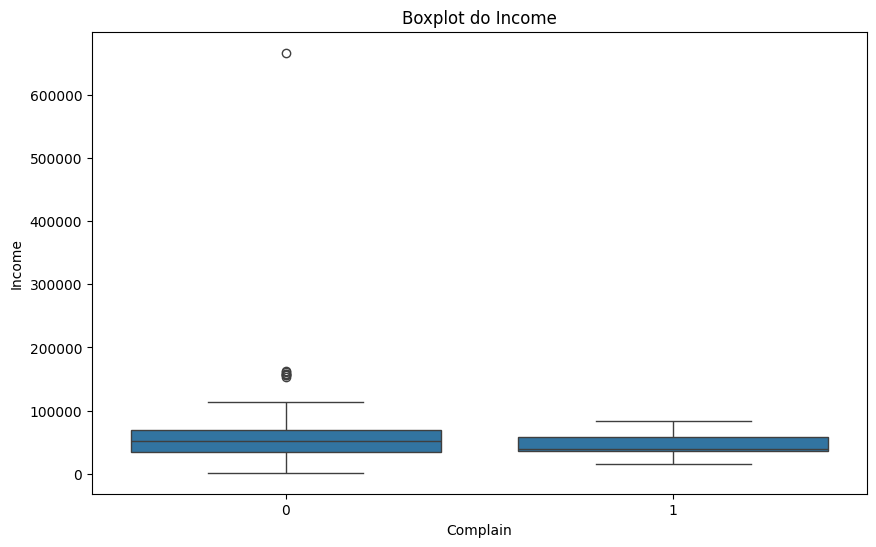

In [24]:

plt.figure(figsize=(10,6))
sns.boxplot(y='Income', x='Complain', data=df)
plt.title('Boxplot do Income')
plt.show()

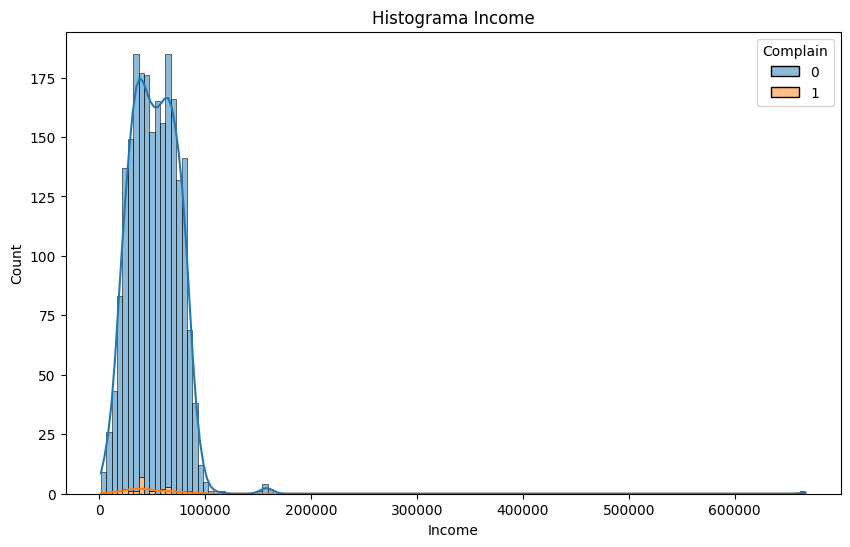

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Income', hue='Complain', kde=True, multiple='stack')
plt.title('Histograma Income')
plt.show()

Por serem poucos registros nulos e todos pertencentes apenas à categoria dos que não fizeram reclamação, esses registros serão eliminados.

In [26]:
df = df[df['Income'].isna() == False].copy()
df.shape

(2216, 28)

### Kidhome e Teenhome

Número de crianças no domicílio do cliente.

In [27]:
df['Kidhome'].describe()

count    2216.000000
mean        0.441787
std         0.536896
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64

In [28]:
df['Kidhome'].value_counts()

Kidhome
0    1283
1     887
2      46
Name: count, dtype: int64

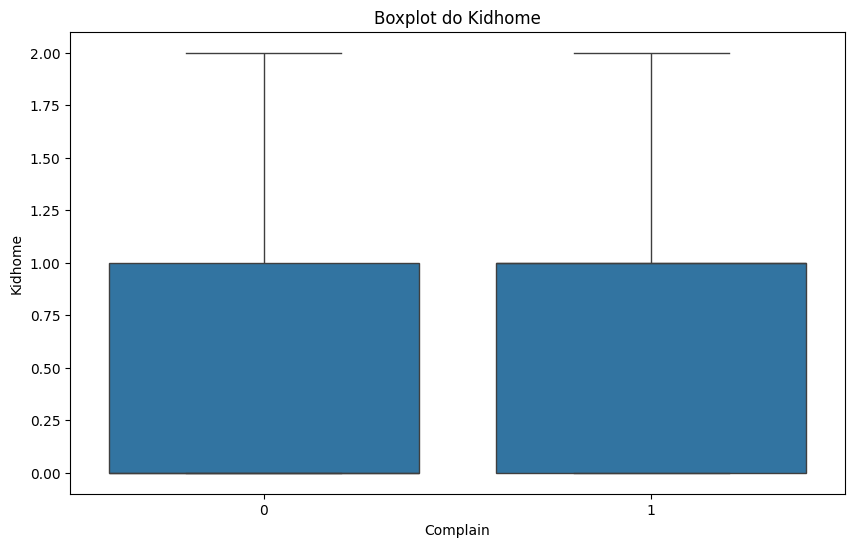

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Kidhome', x='Complain', data=df)
plt.title('Boxplot do Kidhome')
plt.show()

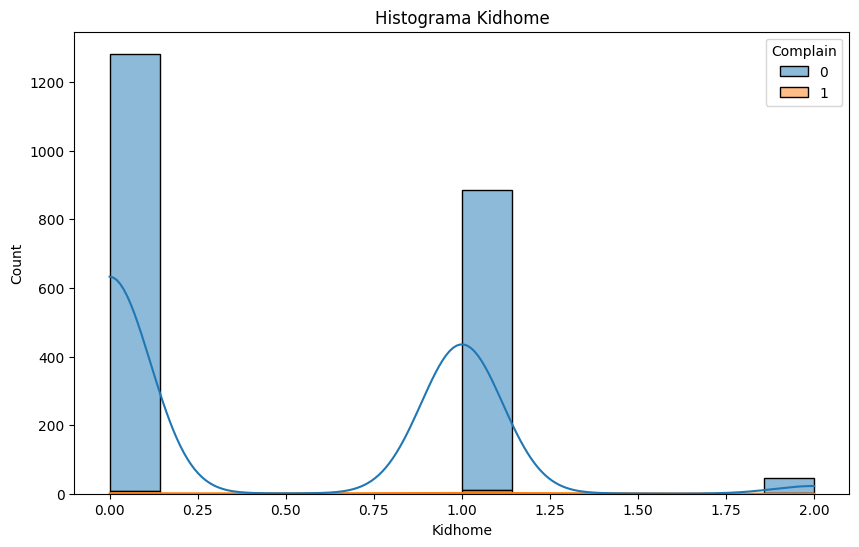

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Kidhome', hue='Complain', kde=True, multiple='stack')
plt.title('Histograma Kidhome')
plt.show()

In [31]:
df['Teenhome'].describe()

count    2216.000000
mean        0.505415
std         0.544181
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64

In [32]:
df['Teenhome'].value_counts()

Teenhome
0    1147
1    1018
2      51
Name: count, dtype: int64

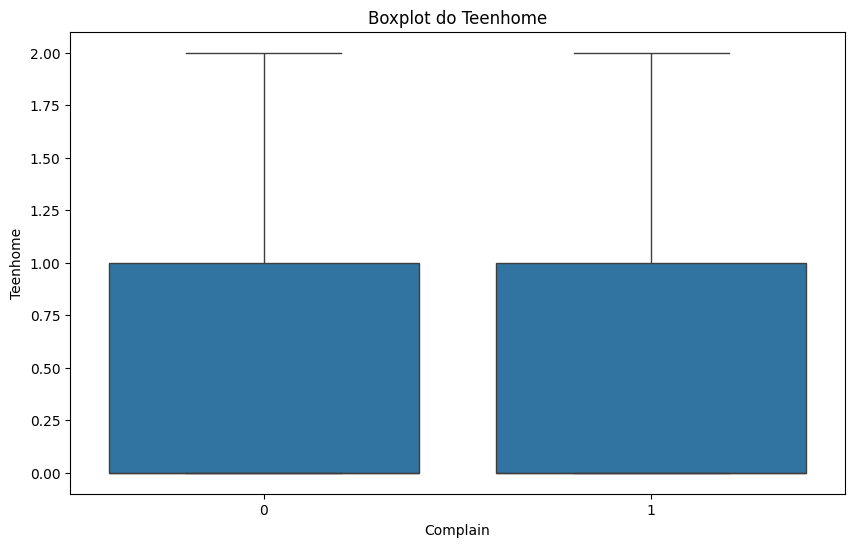

In [33]:
# CreditScore x Exit

plt.figure(figsize=(10,6))
sns.boxplot(y='Teenhome', x='Complain', data=df)
plt.title('Boxplot do Teenhome')
plt.show()

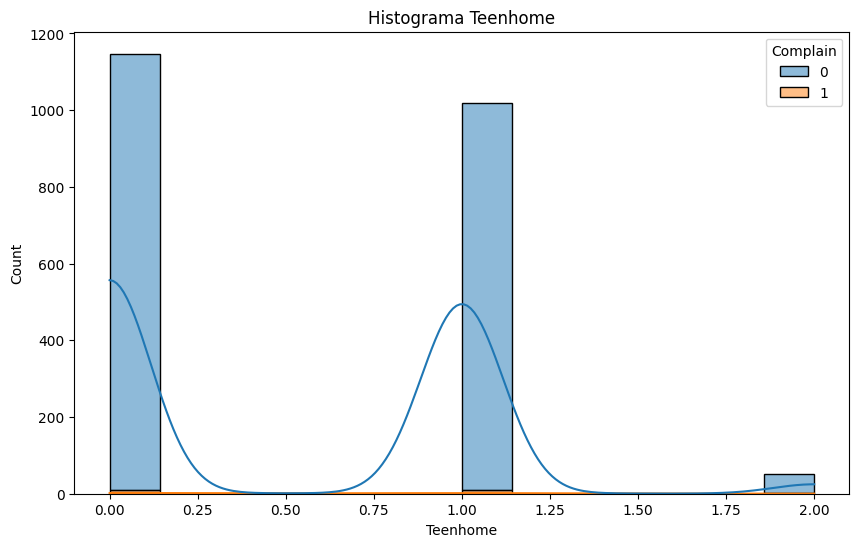

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Teenhome', hue='Complain', kde=True, multiple='stack')
plt.title('Histograma Teenhome')
plt.show()

### Dt_Customer

Data de cadastro do cliente na empresa. Pode ser transformada em número de dias desde que o cliente se cadastrou.

In [35]:
df['Days_Customer'] = (pd.to_datetime(date.today()) - pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y'))
df['Days_Customer'] = df['Days_Customer'].dt.days

In [36]:
df['Days_Customer'].describe()

count    2216.000000
mean     4210.521209
std       202.434667
min      3857.000000
25%      4037.000000
50%      4212.500000
75%      4386.000000
max      4556.000000
Name: Days_Customer, dtype: float64

In [37]:
df['Complain'].value_counts()

Complain
0    2195
1      21
Name: count, dtype: int64

In [38]:
df['Days_Customer'].value_counts()

Days_Customer
4524    12
3905    11
4357    11
4512    11
3895    10
        ..
4097     1
4180     1
4483     1
4413     1
4028     1
Name: count, Length: 662, dtype: int64

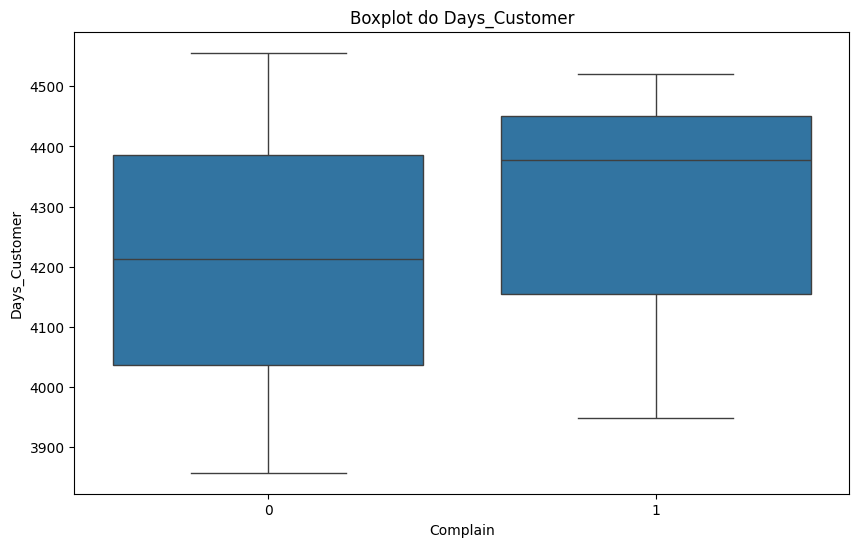

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Days_Customer', x='Complain', data=df)
plt.title('Boxplot do Days_Customer')
plt.show()

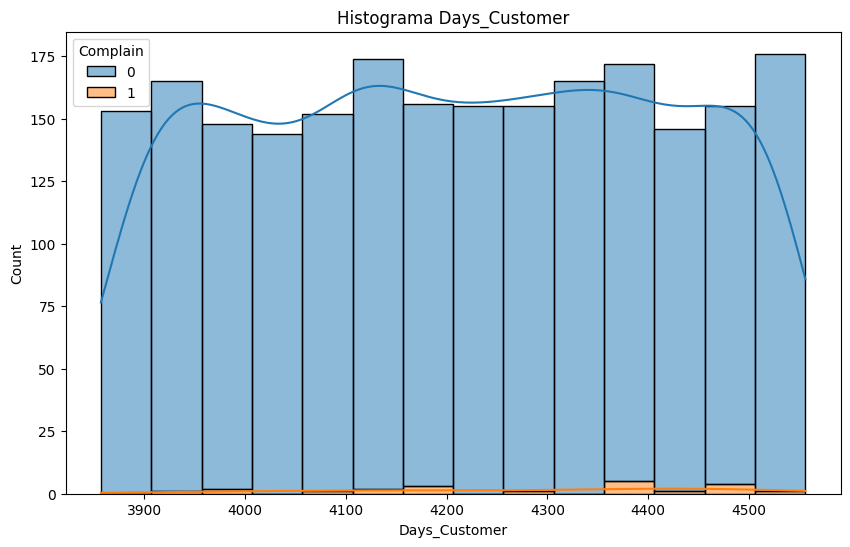

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Days_Customer', hue='Complain', kde=True, multiple='stack')
plt.title('Histograma Days_Customer')
plt.show()

In [41]:
df.drop(columns=['Dt_Customer'], inplace=True, errors='ignore')

Dt_customer foi substituído por Days_Customer.

### Recency

Número de dias desde a última compra do cliente

In [42]:
df['Recency'].describe()

count    2216.000000
mean       49.012635
std        28.948352
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [43]:
df['Recency'].value_counts()

Recency
56    37
30    32
54    32
46    31
92    30
      ..
58    15
59    14
22    13
7     12
44    11
Name: count, Length: 100, dtype: int64

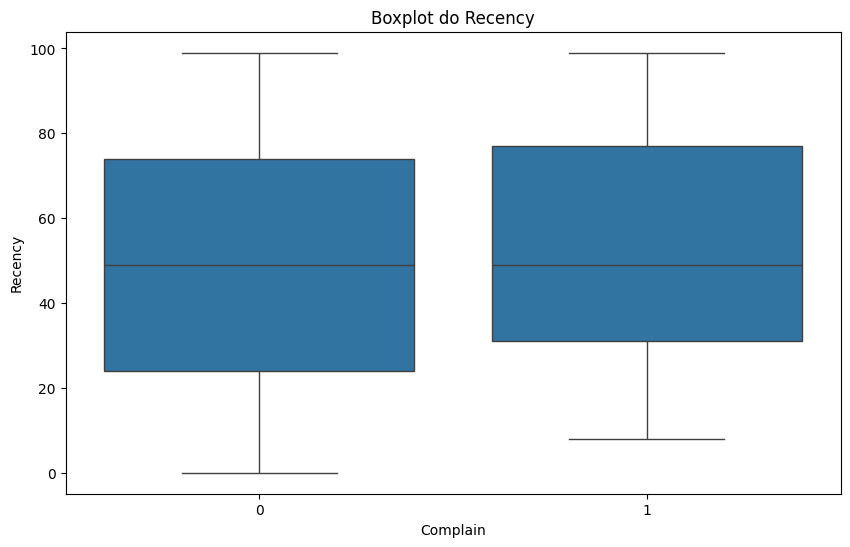

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Recency', x='Complain', data=df)
plt.title('Boxplot do Recency')
plt.show()

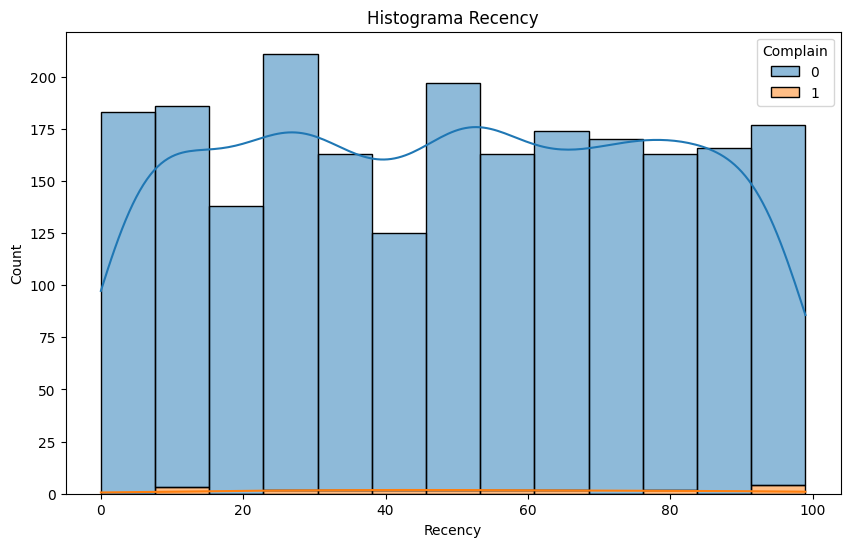

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Recency', hue='Complain', kde=True, multiple='stack')
plt.title('Histograma Recency')
plt.show()

### Gastos com Produtos

*   **MntWines:** Valor gasto em vinhos nos últimos 2 anos.
*   **MntFruits:** Valor gasto em frutas nos últimos 2 anos.
*   **MntMeatProducts:** Valor gasto em carnes nos últimos 2 anos.
*   **MntFishProducts:** Valor gasto em peixes nos últimos 2 anos.
*   **MntSweetProducts:** Valor gasto em doces nos últimos 2 anos.
*   **MntGoldProds:** Valor gasto em ouro nos últimos 2 anos.

In [46]:
columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df[columns].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253
std,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


In [47]:
df[columns].isnull().sum()


MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
dtype: int64

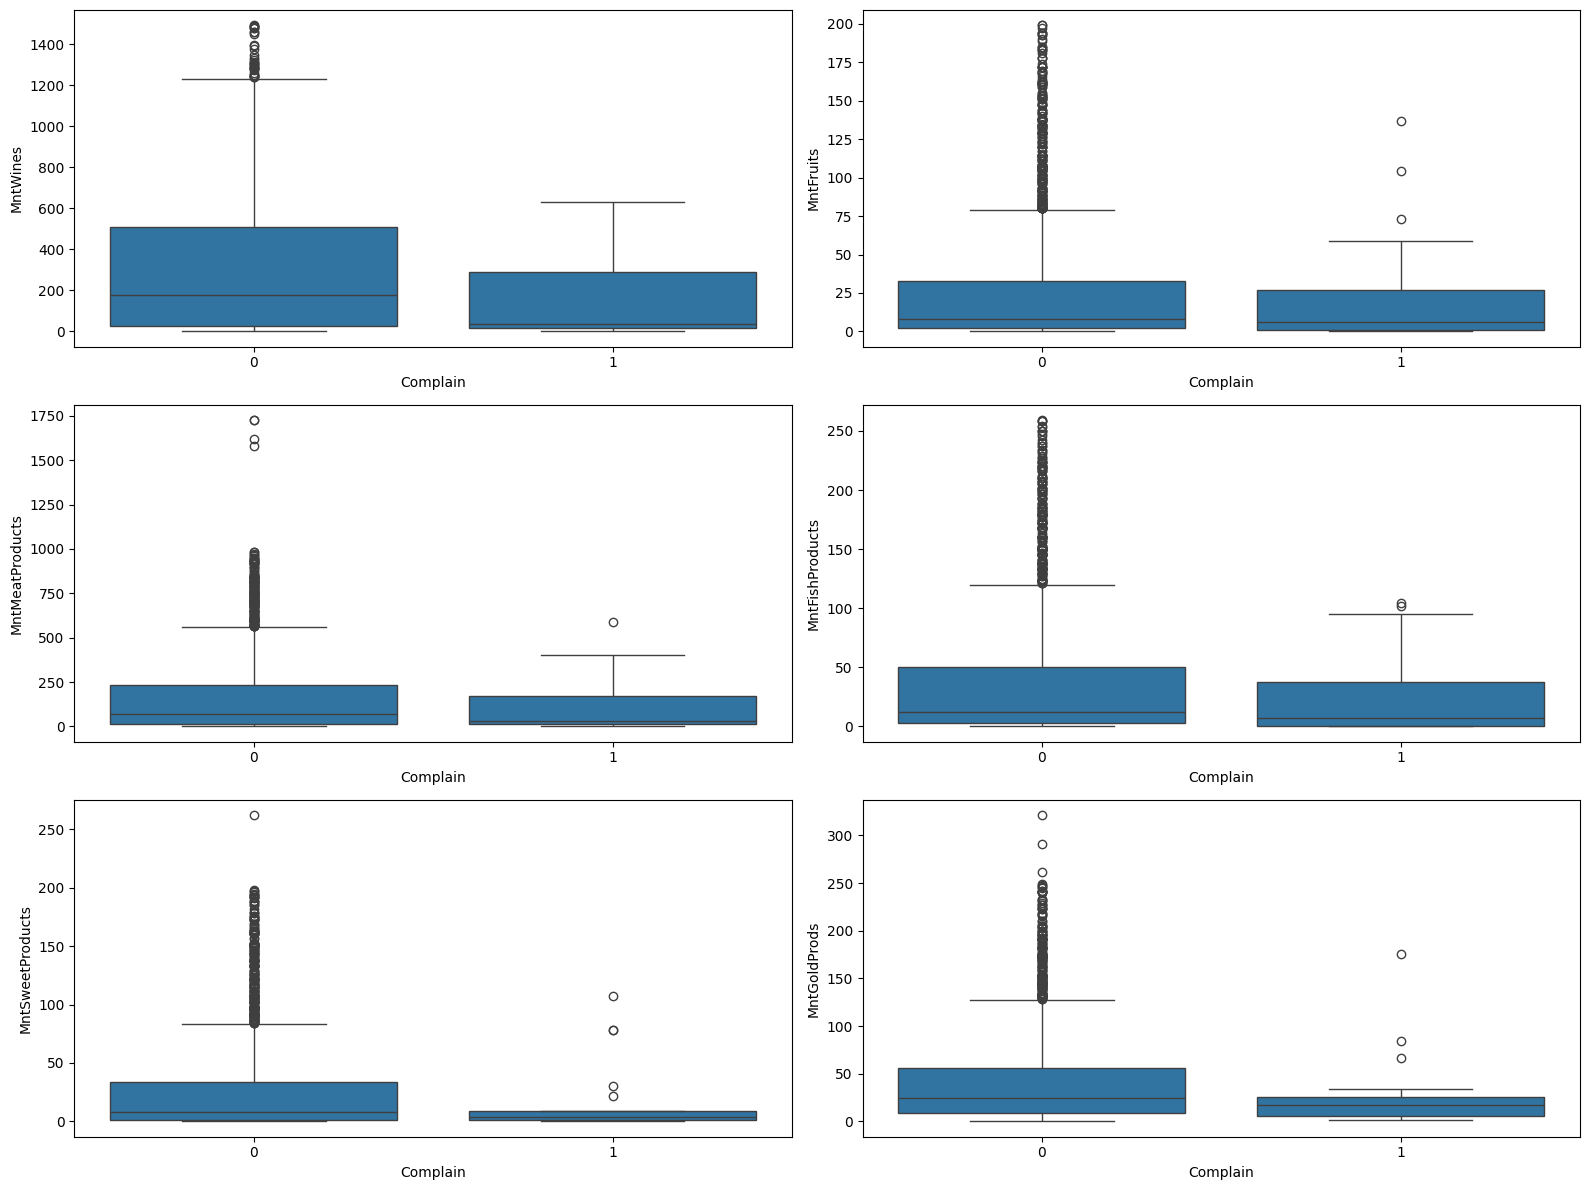

In [48]:
f, axes = plt.subplots(3, 2, figsize=(16, 12))

for i, column in enumerate(columns):
    sns.boxplot(y=column, x='Complain', data=df, ax=axes[i//2, i%2])

plt.tight_layout()
plt.show()

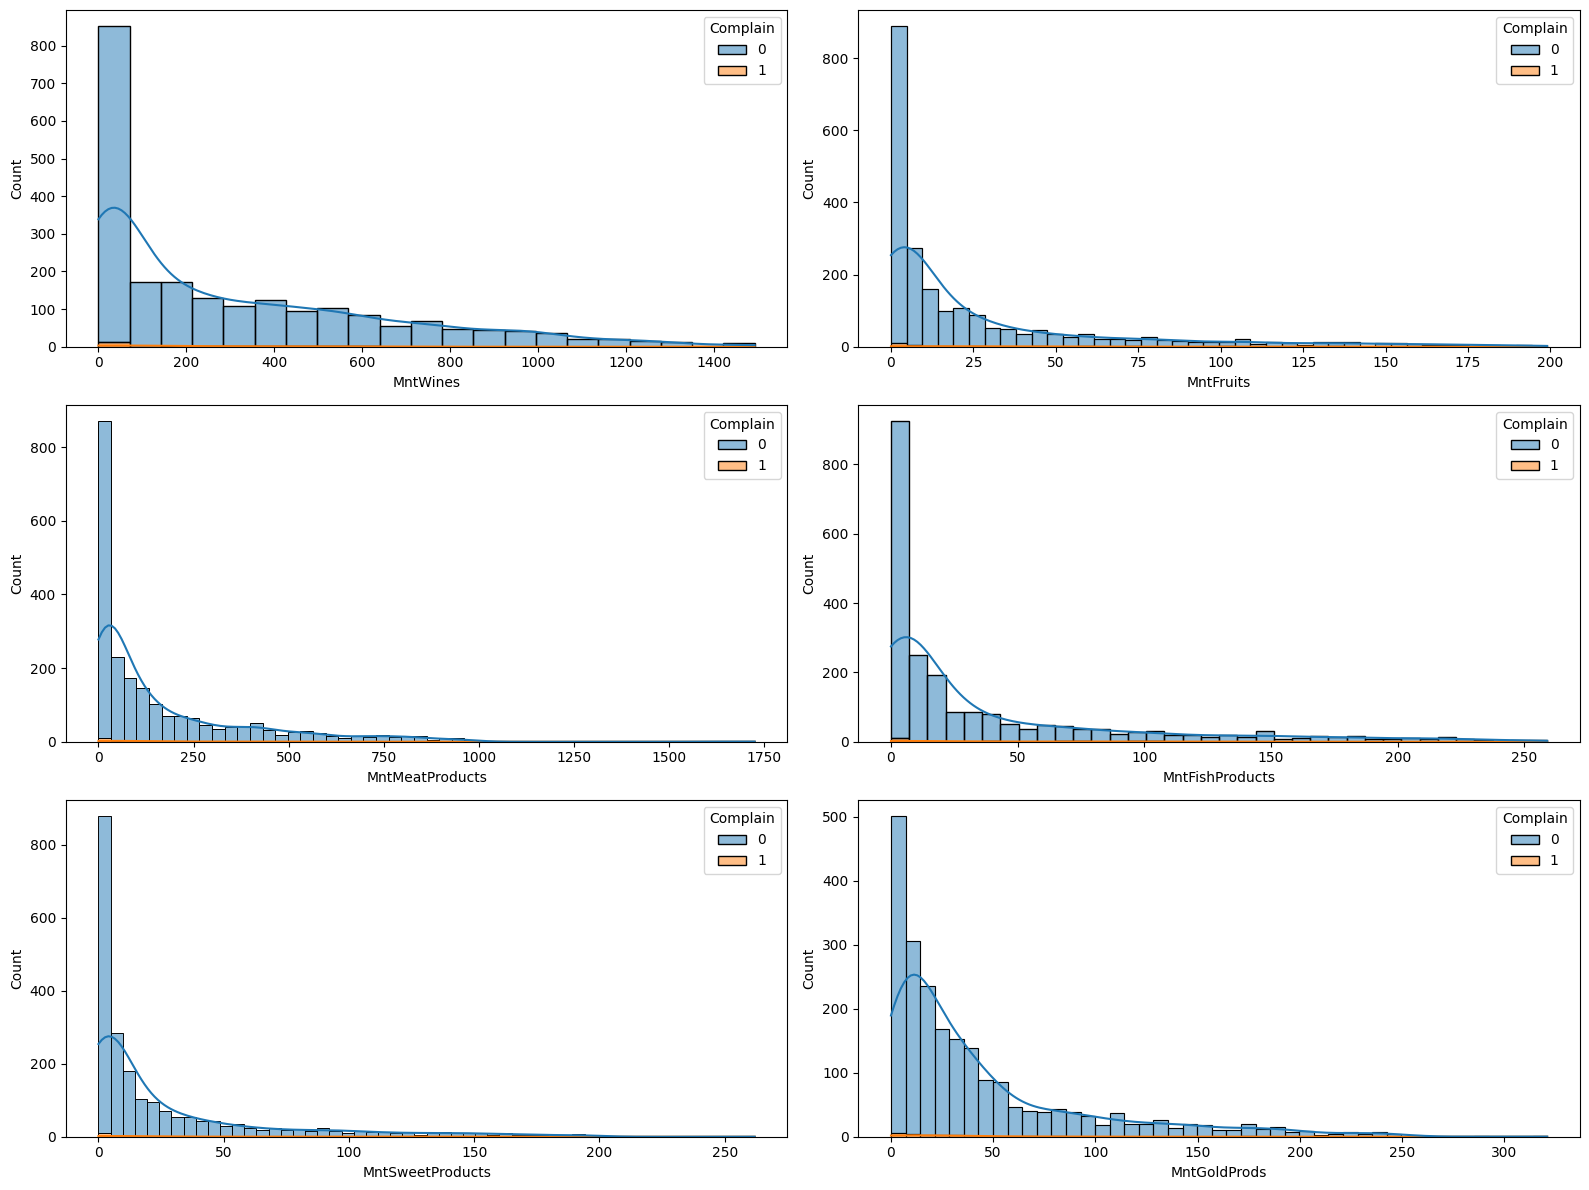

In [49]:
f, axes = plt.subplots(3, 2, figsize=(16, 12))

for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, hue='Complain', kde=True, multiple='stack', ax=axes[i//2, i%2])

plt.tight_layout()
plt.show()

### Local / Canal de Compra

*   **NumWebPurchases:** Número de compras feitas através do site da empresa.
*   **NumCatalogPurchases:** Número de compras feitas usando um catálogo.
*   **NumStorePurchases:** Número de compras feitas diretamente nas lojas.
*   **NumWebVisitsMonth:** Número de visitas ao site da empresa no último mês.

In [50]:
columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df[columns].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.323556,4.085289,2.671029,5.800993
std,1.923716,2.740951,2.926734,3.250785
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000


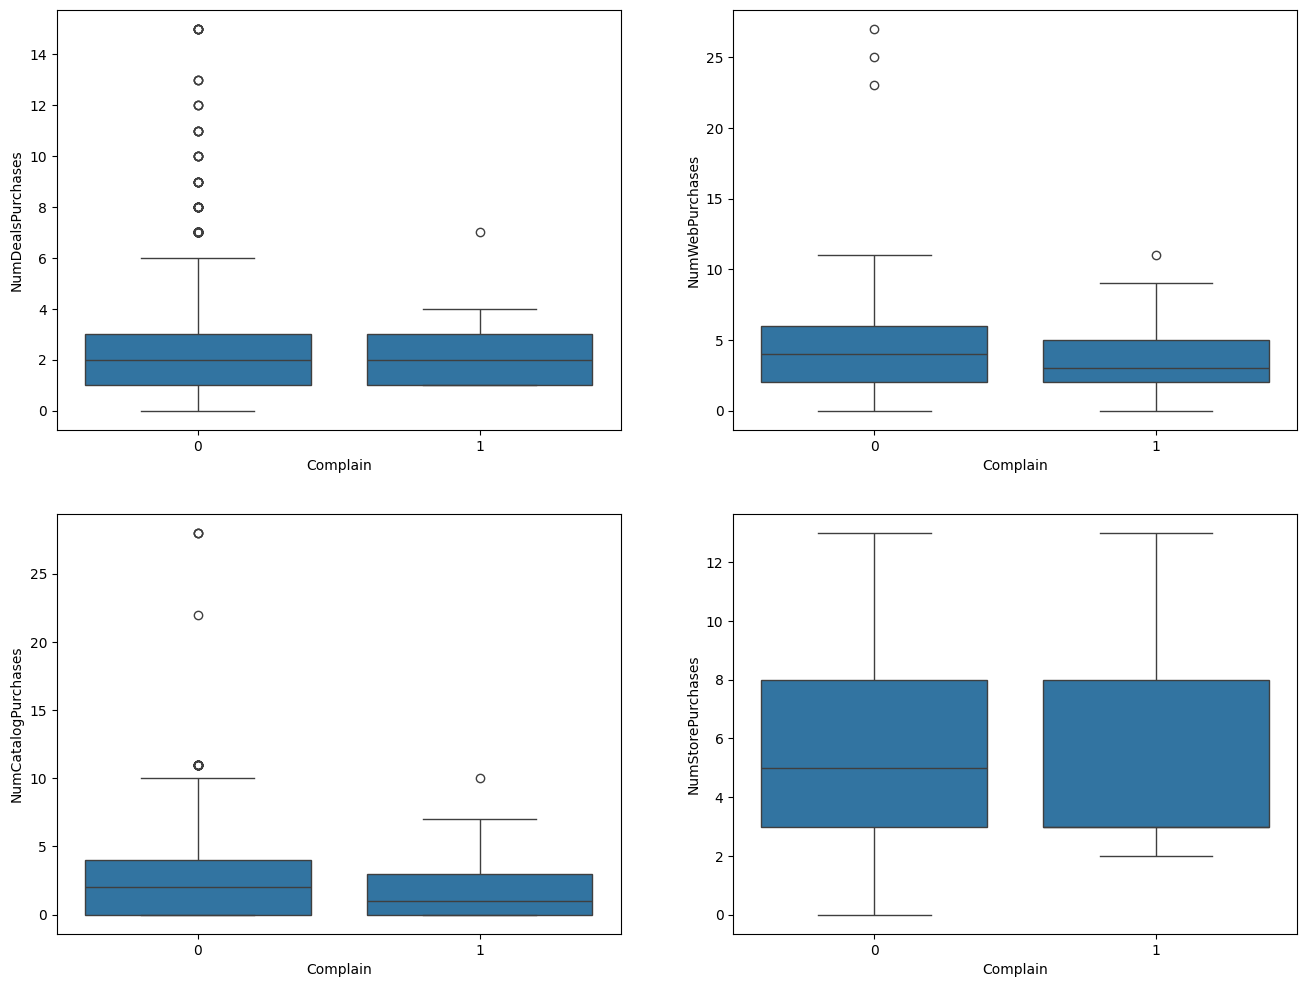

In [51]:
f, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, column in enumerate(columns):
    sns.boxplot(y=column, x='Complain', data=df, ax=axes[i//2, i%2])

plt.show()

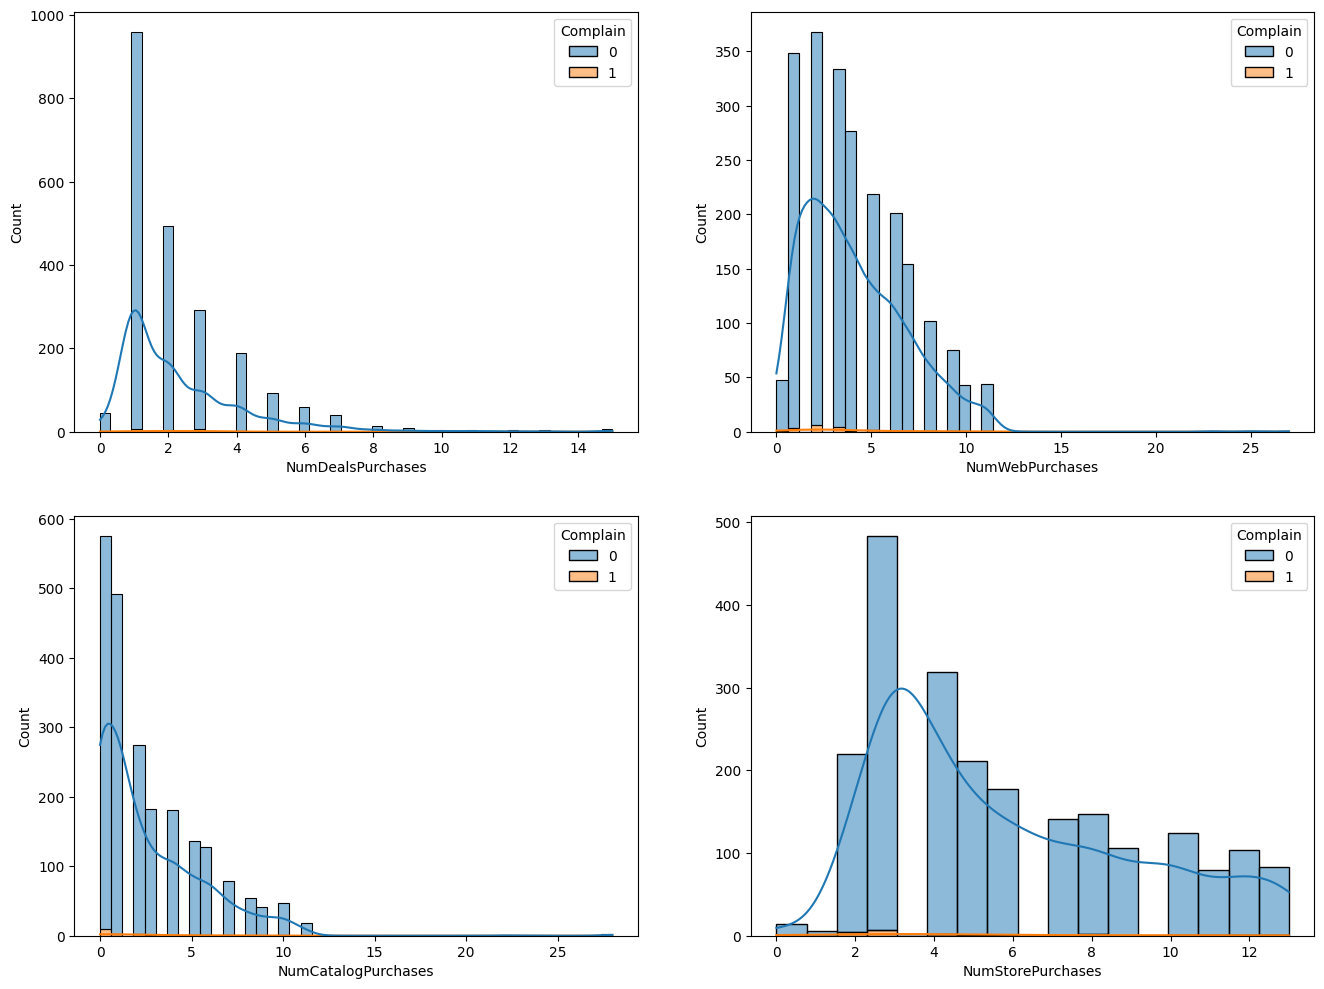

In [52]:
f, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, hue='Complain', kde=True, multiple='stack', ax=axes[i//2, i%2])

plt.show()

### Promoção

*   **NumDealsPurchases:** Número de compras feitas com desconto.
*   **AcceptedCmp1:** 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário.
*   **AcceptedCmp2:** 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário.
*   **AcceptedCmp3:** 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário.
*   **AcceptedCmp4:** 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário.
*   **AcceptedCmp5:** 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário.
*   **Response:** 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário.

In [53]:
columns = ['NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
df[columns]

,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,7,0,0,0,0,0,1,0
1,5,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2235,5,0,0,0,0,0,0,0
2236,7,1,0,0,0,0,0,0
2237,6,0,0,0,1,0,0,0
2238,3,0,0,0,0,0,0,0


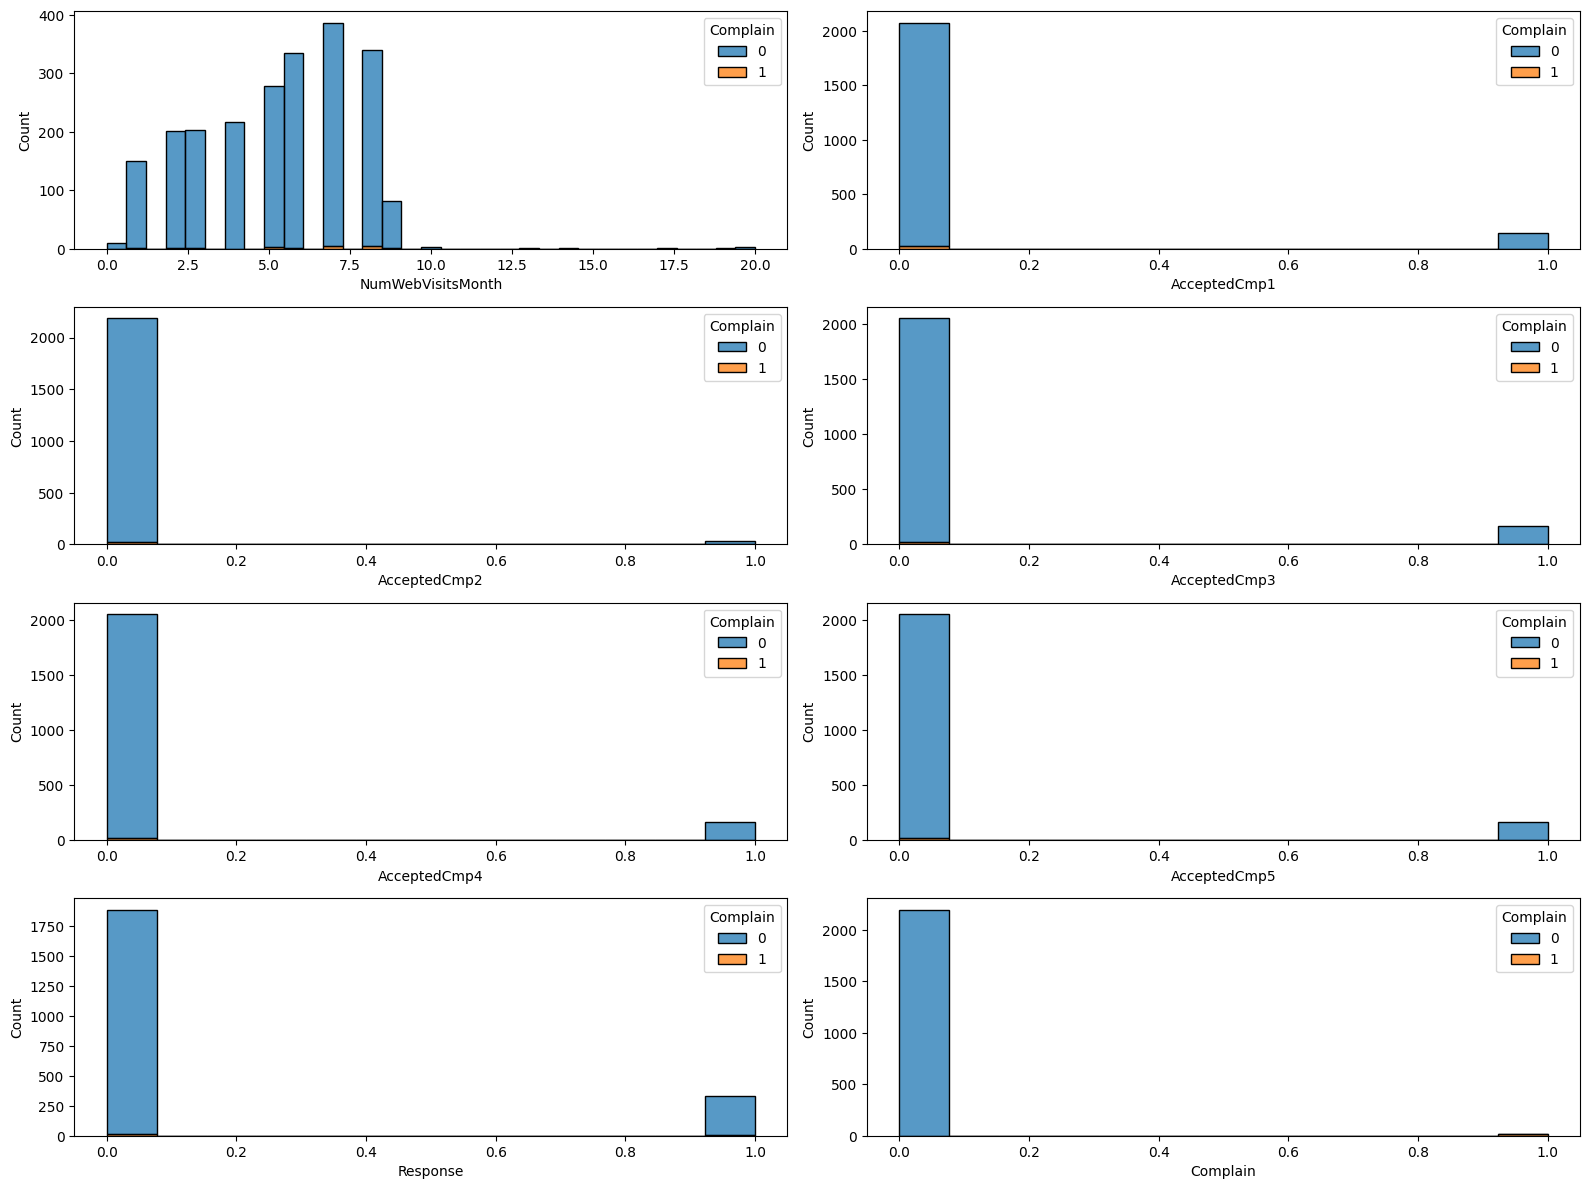

In [54]:
f, axes = plt.subplots(4, 2, figsize=(16, 12))

for i, column in enumerate(columns):
    sns.histplot(x=column, data=df, ax=axes[i//2, i%2], hue='Complain',  multiple='stack')
    
plt.tight_layout()
plt.show()

### Multivariada

In [55]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Customer
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,4520
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,3970
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,4169
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,3996
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,4018


In [56]:
# Dummies
df_model = pd.get_dummies(df, columns=['Marital_Status','Education'], drop_first=False)
df_model.describe()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Customer
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,56.179603,4210.521209
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,202.434667
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,29.000000,3857.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,48.000000,4037.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,4212.500000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,66.000000,4386.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,132.000000,4556.000000


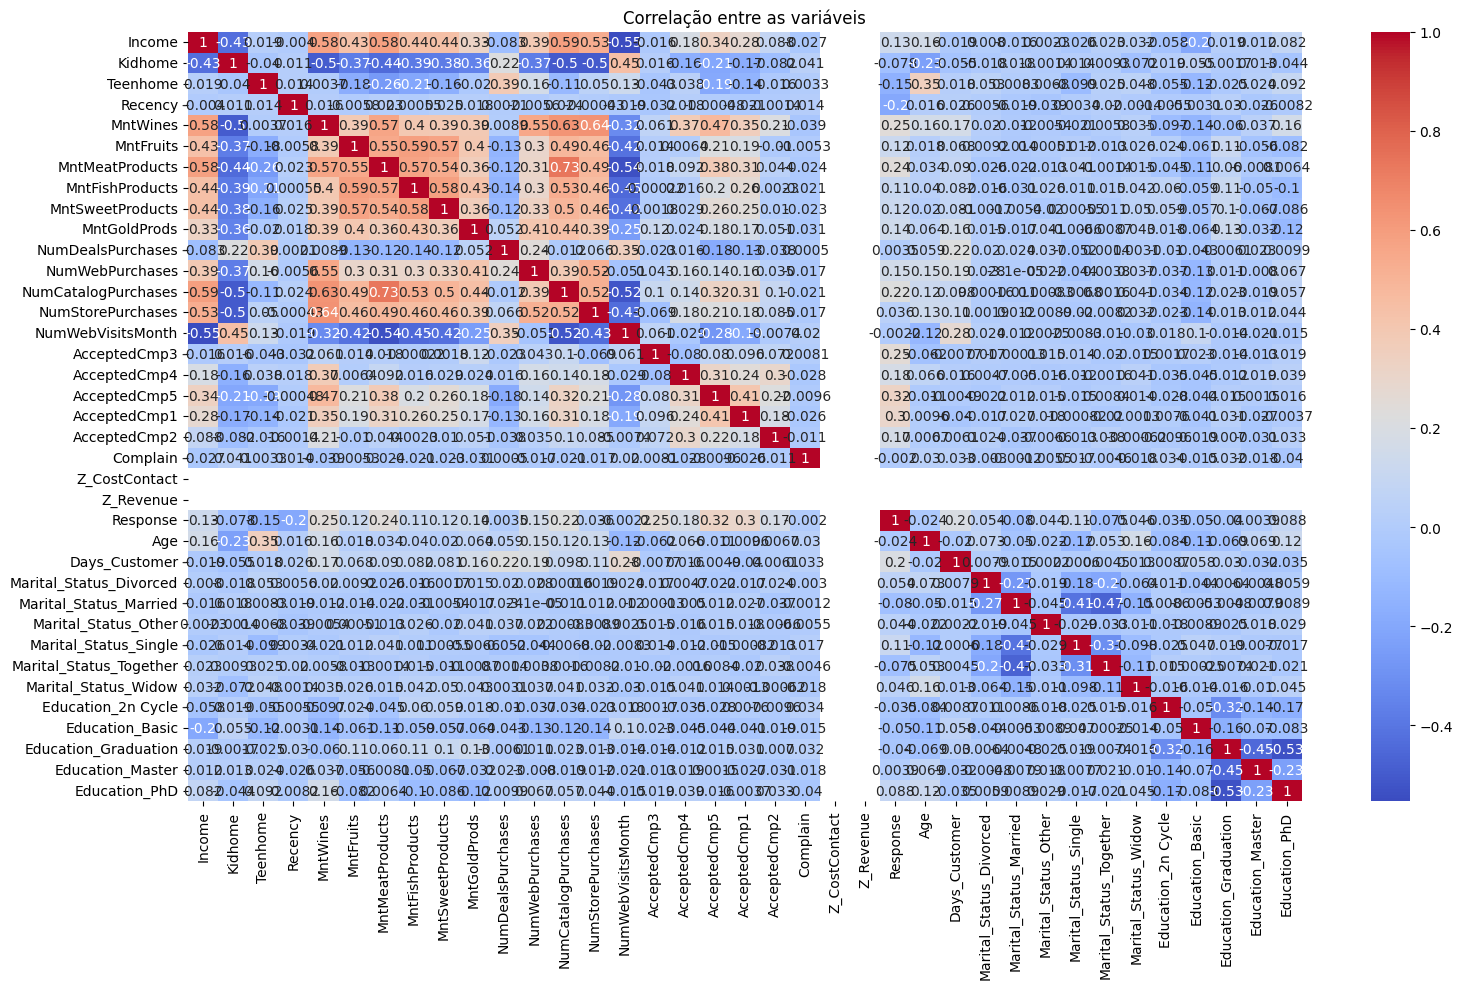

In [57]:
# correlacoes / heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre as variáveis')
plt.tight_layout()
plt.show()


#### Colunas com alta correlação

In [58]:
# identificar pares de colunas com alta correlação
correlation = df_model.corr()
correlation = correlation.stack().reset_index()
correlation.columns = ['Feature1', 'Feature2', 'Correlation']
correlation = correlation[correlation['Feature1'] != correlation['Feature2']]
correlation = correlation.sort_values(by='Correlation', ascending=False)
threshold = 0.6
correlation = correlation[(correlation['Correlation'] > threshold) | (correlation['Correlation'] < -threshold)]
correlation

,Feature1,Feature2,Correlation
222,MntMeatProducts,NumCatalogPurchases,0.734127
426,NumCatalogPurchases,MntMeatProducts,0.734127
459,NumStorePurchases,MntWines,0.640012
153,MntWines,NumStorePurchases,0.640012
424,NumCatalogPurchases,MntWines,0.634753
152,MntWines,NumCatalogPurchases,0.634753


Deixaremos a seleção de features escolher as melhores colunas.

#### Eliminar colunas com baixa variancia

In [59]:
df_model.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Customer,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,4520,False,False,False,True,False,False,False,False,True,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,3970,False,False,False,True,False,False,False,False,True,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,4169,False,False,False,False,True,False,False,False,True,False,False
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,3996,False,False,False,False,True,False,False,False,True,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,4018,False,True,False,False,False,False,False,False,False,False,True


In [60]:
# eliminar colunas com baixa variância
columns_for_remove = []

for column in df_model.columns:
    if df_model[column].var() < 0.01:
        columns_for_remove.append(column)

# não remover a coluna alvo
try:
    columns_for_remove.remove('Complain')
except:
    pass

print(columns_for_remove)

df_model.drop(columns=columns_for_remove, inplace=True, errors='ignore')


['Z_CostContact', 'Z_Revenue', 'Marital_Status_Other']


## Conclusões Iniciais após a análise exploratória

* O número de registros que realizaram reclamações é muito baixo e pode não ser suficiente para treinar adequadamente um modelo;
* Diversas variáveis possuem uma correlação moderada a alta;
* Não ficaram evidentes relações fortes entre a variável alvo e as variáveis independentes;

## Modelagem

In [61]:
# Dummies
df_model_dummies = df_model.copy()

for c in df_model_dummies.columns:
    df_model_dummies[c] = df_model_dummies[c].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    df_model_dummies.drop(columns=['Complain']), 
    df_model_dummies['Complain'], 
    test_size=0.3, 
    random_state=SEED, 
    stratify=df_model_dummies['Complain'])

# shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1551, 33), (1551,), (665, 33), (665,))

In [62]:
y_train.value_counts(), y_test.value_counts()

(Complain
 0.0    1536
 1.0      15
 Name: count, dtype: int64,
 Complain
 0.0    659
 1.0      6
 Name: count, dtype: int64)

### Seleção de Variáveis

In [63]:
n_samples_pos = y_train.value_counts()[1]
n_samples_neg = y_train.value_counts()[0]
scale_pos_weight = n_samples_neg / n_samples_pos


estimator = XGBClassifier(
    random_state=SEED,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    )

results = []
for i in tqdm.tqdm(range(15, 34)):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=SEED)
    gscv = GridSearchCV(
        estimator=selector, 
        param_grid={},
        cv=cv,
        n_jobs=1,
        scoring='roc_auc'
    )
    gscv.fit(X_train, y_train)
    mean_score = gscv.cv_results_['mean_test_score'][0]
    std_score = gscv.cv_results_['std_test_score'][0]
    features = gscv.best_estimator_.get_feature_names_out()    
    
    ci_i, ci_f = conf_interval(mean_score, std_score, 5)
    # append dict results
    results.append({
        'n_features': i,
        'mean_score': mean_score,
        'std_score': std_score,
        'features': features,
        'ci95_i': ci_i,
        'ci95_f': ci_f,
    })

df_feature_selection_results = pd.DataFrame(results).sort_values(by='mean_score', ascending=False)

display(df_feature_selection_results.head(5))

selected_features = df_feature_selection_results.iloc[0]['features']
selected_features

100%|██████████| 19/19 [01:24<00:00,  4.44s/it]


,n_features,mean_score,std_score,features,ci95_i,ci95_f
5,20,0.744564,0.056413,"[Income, Teenhome, Recency, MntWines, MntFruit...",0.587936,0.901193
3,18,0.740218,0.063537,"[Income, Recency, MntWines, MntFruits, MntMeat...",0.563811,0.916625
4,19,0.737395,0.059220,"[Income, Recency, MntWines, MntFruits, MntMeat...",0.572975,0.901816
1,16,0.733169,0.063465,"[Income, Recency, MntWines, MntFruits, MntMeat...",0.556963,0.909375
2,17,0.728079,0.071120,"[Income, Recency, MntWines, MntFruits, MntMeat...",0.530619,0.925539


array(['Income', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumWebVisitsMonth', 'Age', 'Days_Customer',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Education_2n Cycle',
       'Education_Master', 'Education_PhD'], dtype=object)

### Seleção de Modelos

Serão utilizados algoritmos de classificação que sejam robustos para lidar com desbalanceamento de classes, outliers e multicolinearidade:

*   **SVM**
*   **Random Forest**
*   **XGBoost**

Além disso, a métrica de avaliação será a ROCAUC, que é uma métrica robusta para avaliar a performance de modelos de classificação binária, especialmente em casos de desbalanceamento de classes.

Será utilizado o método de validação cruzada estratificada com 5 folds com 2 repetições embaralhadas para avaliar a performance dos modelos.

In [64]:
selected_features = ['Income', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumWebVisitsMonth', 'Age', 'Days_Customer',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Education_2n Cycle',
       'Education_Master', 'Education_PhD']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected.describe()

,Income,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth,Age,Days_Customer,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Education_2n Cycle,Education_Master,Education_PhD
count,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000
mean,52153.780142,0.508059,49.272083,304.546744,26.868472,168.726628,36.656995,27.437137,42.809800,2.326241,4.100580,5.319794,56.388781,4212.231464,0.381044,0.204384,0.269504,0.092199,0.164410,0.220503
std,26528.461066,0.542187,29.142998,337.638442,41.206445,229.335534,54.329886,41.687947,50.830362,1.899562,2.780846,2.373969,12.001682,204.436159,0.485800,0.403381,0.443845,0.289399,0.370767,0.414719
min,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3857.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34976.000000,0.000000,24.000000,23.000000,2.000000,15.000000,2.000000,1.000000,8.000000,1.000000,2.000000,4.000000,48.000000,4037.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51518.000000,0.000000,49.000000,172.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,6.000000,55.000000,4213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68134.000000,1.000000,75.000000,505.000000,32.000000,230.000000,46.000000,34.000000,54.000000,3.000000,6.000000,7.000000,66.000000,4390.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,20.000000,126.000000,4556.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
n_samples_0 = (y_train == 0).sum()
n_samples_1 = (y_train == 1).sum()

scale_pos_weight = n_samples_0 / n_samples_1
lista_modelos = [
    {
        'model': SVC(random_state=SEED, max_iter=500),
        'grid': {
            'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'model__kernel': ['poly', 'rbf', 'sigmoid'],
            'model__degree': [2, 3, 4, 5],
            'model__gamma': ['scale', 'auto'],
            'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
        },
    },
    {
        'model': RandomForestClassifier(random_state=SEED),
        'grid': {
            'model__n_estimators': [10, 50, 100],
            'model__max_depth': [3, 4, 5, 10],
            'model__min_samples_split': [2, 3, 4],
            'model__min_samples_leaf': [1, 2, 3],
            'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
        },
    },
    {
        'model': XGBClassifier(
            objective='binary:logistic', 
            random_state=SEED, 
            scale_pos_weight=scale_pos_weight),
        'grid': {
            'model__objective': ['binary:logistic'],
            'model__n_estimators': [10, 50, 100, 200],
            'model__max_depth': [3, 4, 5],
            'model__subsample': [0.85, 0.95],
            'model__colsample_bytree': [0.85, 0.95],
            'model__learning_rate': [0.03, 0.3],
            'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
        },
    },
]

def conf_interval(mean, std, n, alpha=0.95):
    h = std * t.ppf((1 + alpha) / 2, n - 1)
    cii, cif = mean - h, mean + h
    return cii.item(), cif.item()


melhores = []

for parametros in tqdm.tqdm(lista_modelos):
    pipeline = Pipeline([
        ('scaler', None),
        ('model', parametros['model'])
    ])

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=SEED)
    grid_search = GridSearchCV(
        pipeline, 
        param_grid=parametros['grid'],
        cv=cv, 
        n_jobs=14, 
        scoring='roc_auc', 
        verbose=2
        )
    grid_search.fit(X_train_selected, y_train)

    results = pd.DataFrame(grid_search.cv_results_)
    results.sort_values('mean_test_score', inplace=True, ascending=False)
    cii, cif = conf_interval(results['mean_test_score'].mean(), results['std_test_score'].mean(), 5)
    melhores.append({
        'model': parametros['model'].__class__.__name__,
        'best_score': grid_search.best_score_,
        'mean_score': results['mean_test_score'].mean(),
        'std_score': results['std_test_score'].mean(),
        'CI 95%': f'[{cii:.02f}, {cif:.02f}]',
        'best_params': grid_search.best_params_,
        'results': results,
        'estimator': grid_search.best_estimator_,
        'cv_results': grid_search.cv_results_,
    })

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


 33%|███▎      | 1/3 [00:09<00:18,  9.28s/it]

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


 67%|██████▋   | 2/3 [00:42<00:23, 23.20s/it]

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


100%|██████████| 3/3 [00:58<00:00, 19.62s/it]


In [66]:
df_melhores_modelos = pd.DataFrame(melhores).sort_values(by='best_score', ascending=False)
df_melhores_modelos

,model,best_score,mean_score,std_score,CI 95%,best_params,results,estimator,cv_results
2,XGBClassifier,0.728343,0.633465,0.100811,"[0.35, 0.91]","{'model__colsample_bytree': 0.85, 'model__lear...",mean_fit_time std_fit_time mean_score_t...,"(StandardScaler(), XGBClassifier(base_score=No...","{'mean_fit_time': [0.6886058568954467, 0.30050..."
1,RandomForestClassifier,0.681330,0.620972,0.116446,"[0.30, 0.94]","{'model__max_depth': 10, 'model__min_samples_l...",mean_fit_time std_fit_time mean_score_t...,"(None, (DecisionTreeClassifier(max_depth=10, m...","{'mean_fit_time': [0.02178170680999756, 0.0214..."
0,SVC,0.678887,0.547746,0.134089,"[0.18, 0.92]","{'model__C': 0.001, 'model__degree': 2, 'model...",mean_fit_time std_fit_time mean_score_t...,"(RobustScaler(), SVC(C=0.001, degree=2, gamma=...","{'mean_fit_time': [0.010455751419067382, 0.010..."


In [68]:
df_melhores_modelos['best_params'].iloc[0]

{'model__colsample_bytree': 0.85,
 'model__learning_rate': 0.3,
 'model__max_depth': 3,
 'model__n_estimators': 200,
 'model__objective': 'binary:logistic',
 'model__subsample': 0.85,
 'scaler': StandardScaler()}

In [73]:
n_samples_0 = (y_train == 0).sum()
n_samples_1 = (y_train == 1).sum()
scale_pos_weight = n_samples_0 / n_samples_1

model = XGBClassifier(
    objective='binary:logistic', 
    random_state=SEED, 
    scale_pos_weight=scale_pos_weight,
    colsample_bytree=0.85,
    max_depth=3,
    n_estimators=200,
    model__subsample=0.85,
    learning_rate=0.3,
    eval_metric='auc',
    )

model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)
y_proba = model.predict_proba(X_test_selected)[:,1]

print(classification_report(y_test, y_pred))
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_proba)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       659
         1.0       0.50      0.17      0.25         6

    accuracy                           0.99       665
   macro avg       0.75      0.58      0.62       665
weighted avg       0.99      0.99      0.99       665

Balanced Accuracy: 0.582574607991907
F1 Score: 0.25
Accuracy: 0.9909774436090225
ROC AUC: 0.5409711684370258
Confusion Matrix: 
[[658   1]
 [  5   1]]


## Explicabilidade

In [103]:
shap.initjs()

### Avaliação Geral

In [119]:
explainer = shap.Explainer(model, X_train_selected)
shap_values = explainer(X_train_selected)

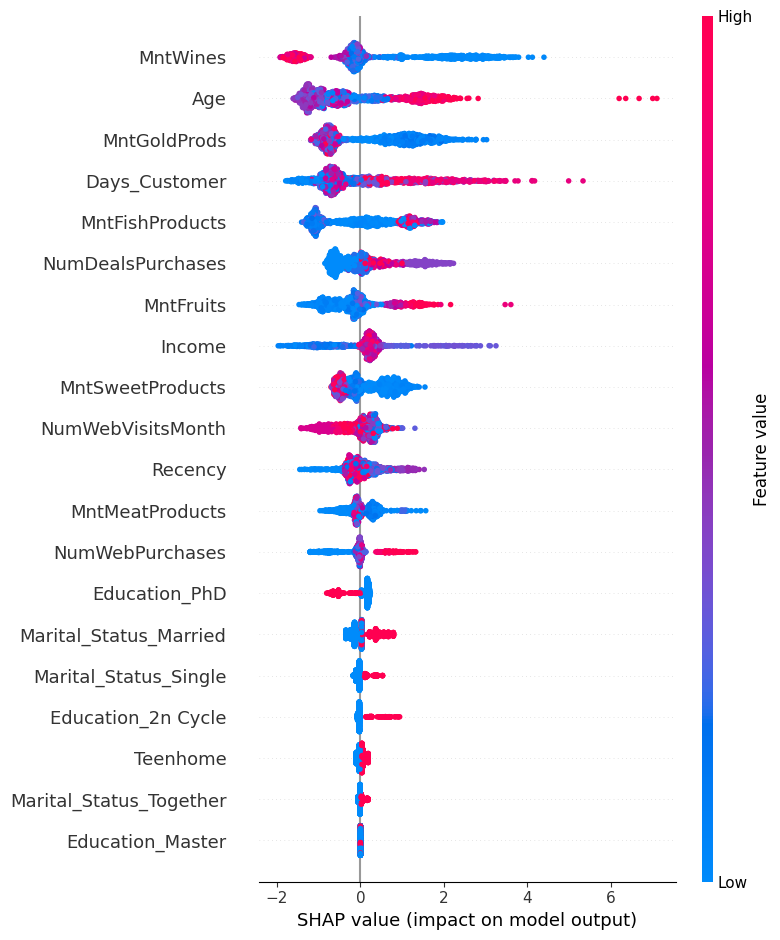

In [120]:
shap.summary_plot(shap_values, X_train_selected, show=True)

### Avaliação para clientes que fizeram reclamações

In [122]:
y_train_pred = model.predict(X_train_selected)
example_index_1 = np.where(y_train_pred == 1)
example_index_1

(array([ 432,  483,  534,  579,  593,  644,  933,  958,  986, 1071, 1238,
        1292, 1348, 1371, 1513]),)

In [123]:
explainer = shap.Explainer(model, X_train_selected)
shap_values = explainer(X_train_selected.iloc[example_index_1])

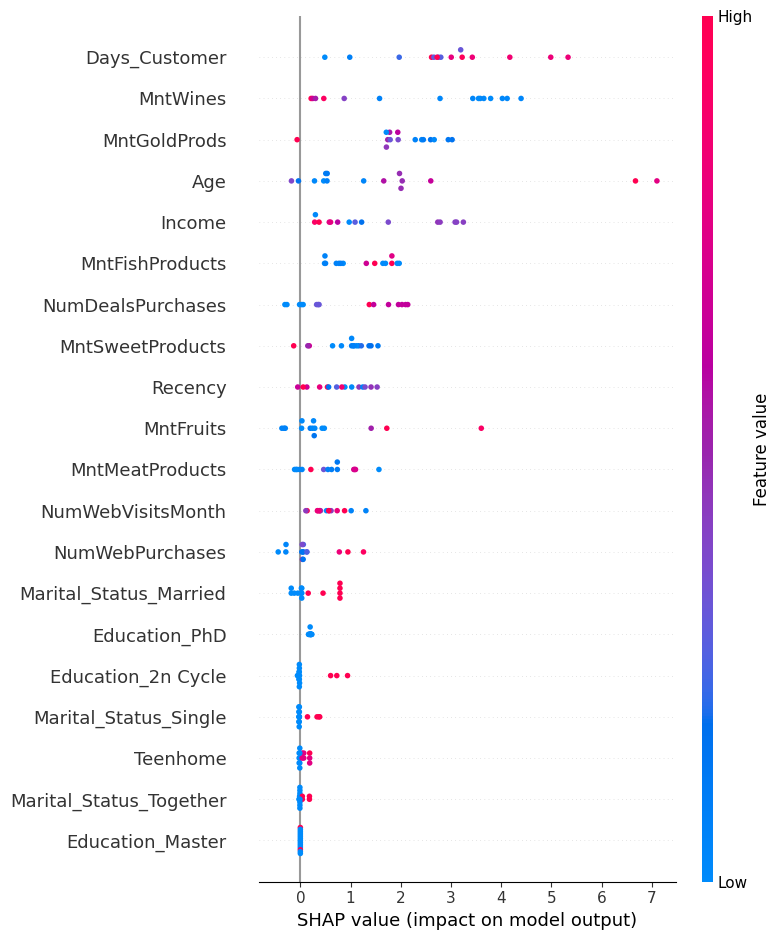

In [113]:
shap.summary_plot(shap_values, features=X_train_selected.iloc[example_index_1], show=True)

# Conclusões e Recomendações

## Dados

A análise exploratória não revelou relações fortes entre a variável alvo e as variáveis independentes.

O dataset possui um desbalanceamento muito alto em relação à variável alvo e o número de registros que realizaram reclamações é muito baixo.

O modelo consegue prever muito bem a classe negativa, mas não consegue prever a classe positiva.

A recomendação é que a empresa colete mais observações sobre as reclamações dos clientes. Esses dados adicionais podem fornecer insights valiosos sobre as causas raiz das reclamações e ajudar a empresa a tomar medidas corretivas e preventivas mais eficazes.


## Explicabilidade

Entretanto, a análise exploratória em conjunto com o modelo de machine learning e a análise com shap forneceram alguns insights sobre o perfil de usuários que realizaram reclamações.

As principais variáveis que influenciam a probabilidade de um cliente realizar uma reclamação são:

* **MntWines:** Clientes que gastam menos em vinhos têm uma probabilidade maior de realizar reclamações.
* **Age:** Clientes mais velhos têm uma probabilidade menos de realizar reclamações.
* **MntGoldProds:** Clientes que gastam menos em ouro têm uma probabilidade maior de realizar reclamações.
* **Days_Customer:** Clientes que estão cadastrados há mais tempo têm uma probabilidade maior de realizar reclamações.
* **MntFishProducts:** Clientes que gastam mais em peixes têm uma probabilidade maior de realizar reclamações.
* **MntFruits:** Clientes que gastam mais em frutas têm uma probabilidade maior de realizar reclamações.
* **Income:** Clientes com renda média têm uma probabilidade maior de realizar reclamações.
* **MntSweetProducts:** Clientes que gastam menos em doces têm uma probabilidade maior de realizar reclamações.